<a href="https://colab.research.google.com/github/willstauffernorris/A_Millenium_of_River_Flows/blob/master/A_Millenium_of_River_Flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

### I'm looking at a reconstruction of river flows over the last 1000+ years.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/willstauffernorris/A_Millenium_of_River_Flows/master/southerncalifornianestedreconstructions.csv')
print(df.shape)
df.head(10)



(901, 25)


Year  ...  Colo_Upper_50Percent_Confidence_Flow_TAF
0  1116  ...                                 23555.608
1  1117  ...                                 24007.123
2  1118  ...                                 20556.740
3  1119  ...                                 18775.425
4  1120  ...                                 18697.363
5  1121  ...                                 13525.811
6  1122  ...                                 17094.556
7  1123  ...                                 14346.984
8  1124  ...                                 15381.769
9  1125  ...                                 14078.048

[10 rows x 25 columns]

In [120]:
df['Colo_Reconstruction_Flow_TAF'].head()

0    21022.672
1    21474.603
2    18001.101
3    16284.796
4    16213.636
Name: Colo_Reconstruction_Flow_TAF, dtype: float64

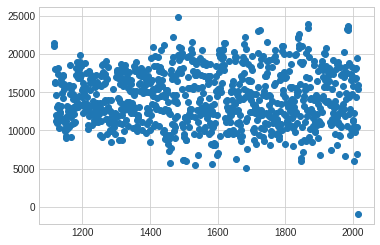

In [121]:
print(plt.scatter(df['Year'], df['Colo_Reconstruction_Flow_TAF']));

### Looks like one of the very last values is off.


In [122]:
df['Colo_Reconstruction_Flow_TAF'].tail()

###Oh, those low values are just NaNs


896     6885.708
897    10391.615
898    15980.435
899    15467.181
900     -999.000
Name: Colo_Reconstruction_Flow_TAF, dtype: float64

In [0]:
###df.isnull().sum()

In [124]:
#### replacing all the -999s with NaNs

df = df.replace(-999, np.nan)

df.head()

Year  ...  Colo_Upper_50Percent_Confidence_Flow_TAF
0  1116  ...                                 23555.608
1  1117  ...                                 24007.123
2  1118  ...                                 20556.740
3  1119  ...                                 18775.425
4  1120  ...                                 18697.363

[5 rows x 25 columns]

In [125]:
df['Colo_Reconstruction_Flow_TAF'].mean()

14301.762388888894

In [126]:
df['Colo_Reconstruction_Flow_TAF'].median()

14011.166

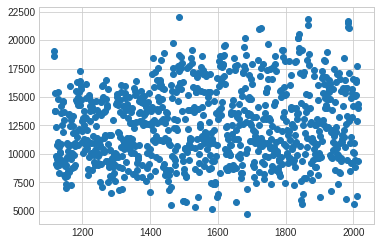

In [127]:
###Doing some exploratory visualizations
print(plt.scatter(df['Year'], df['Colo_Lower_50Percent_Confidence_Flow_TAF']));


<BarContainer object of 901 artists>

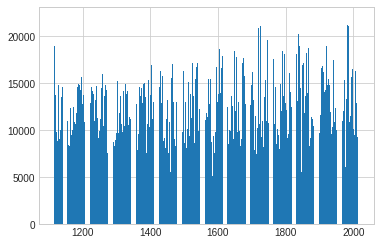

In [128]:
plt.bar(df['Year'], df['Colo_Lower_50Percent_Confidence_Flow_TAF'])

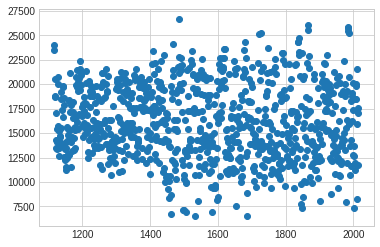

In [129]:

print(plt.scatter(df['Year'], df['Colo_Upper_50Percent_Confidence_Flow_TAF']));

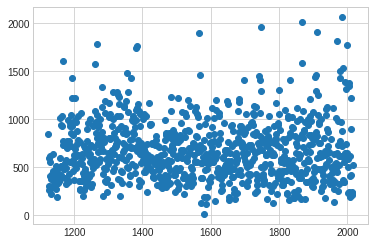

In [130]:
plt.scatter(df['Year'], df['Kern_Reconstruction_Flow_TAF']);
#### looks like the first value is off- there can't be negative amounts

<BarContainer object of 901 artists>

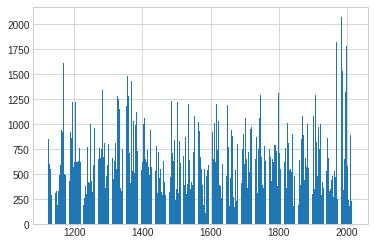

In [131]:
plt.bar(df['Year'], df['Kern_Reconstruction_Flow_TAF'])

In [132]:
####importing northern california flows

df2 = pd.read_csv('https://raw.githubusercontent.com/willstauffernorris/A_Millenium_of_River_Flows/master/northerncaliforniareconstructions.csv')

print(df2.shape)


df2 = df2.replace(-999, np.nan)

df2.head(10)

(1113, 49)


Year   ...  SJQ4_Upper_50_Percent_Flow_AF
0    900  ...                        6222300
1    901  ...                       10771000
2    902  ...                        6134500
3    903  ...                        9469000
4    904  ...                        9314400
5    905  ...                        8659400
6    906  ...                        9533900
7    907  ...                        5967300
8    908  ...                        5793100
9    909  ...                        6743000

[10 rows x 49 columns]

In [133]:
df2.describe().round(5)

Year   ...  SJQ4_Upper_50_Percent_Flow_AF
count  1113.00000  ...                   1.113000e+03
mean   1456.00000  ...                   7.103484e+06
std     321.43973  ...                   2.757411e+06
min     900.00000  ...                   8.151800e+05
25%    1178.00000  ...                   5.008900e+06
50%    1456.00000  ...                   6.721100e+06
75%    1734.00000  ...                   9.166100e+06
max    2012.00000  ...                   1.654400e+07

[8 rows x 49 columns]

In [134]:
df2['Year ']

###That's what's wrong!! There's a space after "Year".

0        900
1        901
2        902
3        903
4        904
        ... 
1108    2008
1109    2009
1110    2010
1111    2011
1112    2012
Name: Year , Length: 1113, dtype: int64

In [135]:
df2 = df2.rename({'Year ': 'Year'}, axis='columns')

df2.head()

Year  ...  SJQ4_Upper_50_Percent_Flow_AF
0   900  ...                        6222300
1   901  ...                       10771000
2   902  ...                        6134500
3   903  ...                        9469000
4   904  ...                        9314400

[5 rows x 49 columns]

<BarContainer object of 1113 artists>

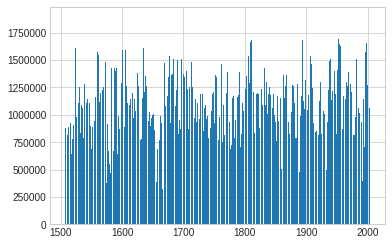

In [136]:
plt.bar(df2['Year'], df2['KLK_Reconstruction_Flow_AF'])

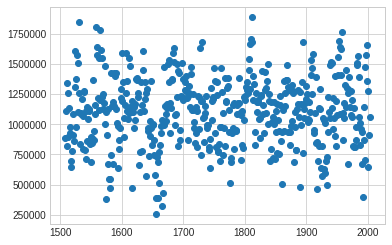

In [137]:
plt.scatter(df2['Year'], df2['KLK_Reconstruction_Flow_AF'])

<BarContainer object of 1113 artists>

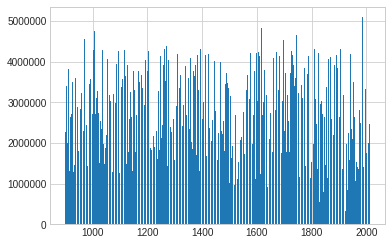

In [138]:
plt.bar(df2['Year'], df2['AMF_Reconstruction_Flow_AF'])

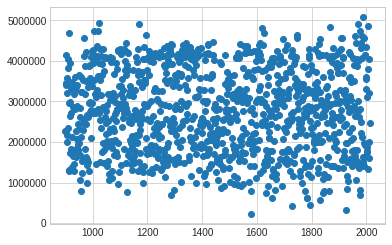

In [139]:
plt.scatter(df2['Year'], df2['AMF_Reconstruction_Flow_AF'])

In [0]:
###The visualizations look better now, and cleaned up.

# Building a new dataframe out of the relevant sections of the source data

### This dataframe is going to feature a few of the bigger rivers in the dataset


In [141]:
####filtering down the first dataframe to the only values I want

df_slim = df.filter(items=['Year', 'Kern_Reconstruction_Flow_TAF', 'Colo_Reconstruction_Flow_TAF'])

df_slim.head()
                    

Year  Kern_Reconstruction_Flow_TAF  Colo_Reconstruction_Flow_TAF
0  1116                           NaN                     21022.672
1  1117                           NaN                     21474.603
2  1118                           NaN                     18001.101
3  1119                           NaN                     16284.796
4  1120                           NaN                     16213.636

In [142]:
df_slim.shape

(901, 3)

In [143]:
df2.tail()

Year  ...  SJQ4_Upper_50_Percent_Flow_AF
1108  2008  ...                        6177500
1109  2009  ...                        4305200
1110  2010  ...                        8358100
1111  2011  ...                        9086800
1112  2012  ...                       10330000

[5 rows x 49 columns]

In [144]:
##df2_slim = df.filter(items=['KLK_Reconstruction_Flow_AF', 'TRN_Reconstruction_Flow_AF', 'FTO_Reconstruction_Flow_AF', 'YRS_Reconstruction_Flow_AF', 'AMF_Reconstruction_Flow_AF', 'SAC4_Reconstruction_Flow_AF', 'TLG_Reconstruction_Flow_AF', 'SJQ4_Reconstruction_Flow_AF'])

df2_slim = df2.filter(items=['Year','KLK_Reconstruction_Flow_AF', 'SAC4_Reconstruction_Flow_AF', 'SJQ4_Reconstruction_Flow_AF'])
df2_slim.shape
df2_slim.head()

Year  ...  SJQ4_Reconstruction_Flow_AF
0   900  ...                      4822100
1   901  ...                      8860200
2   902  ...                      4760300
3   903  ...                      7363200
4   904  ...                      7212000

[5 rows x 4 columns]

In [145]:
df_merged = pd.merge(df2_slim, df_slim, how='outer', on='Year')

df_merged.tail(100)


### Kern and Colorado need to be multiplied by 1000


Year  ...  Colo_Reconstruction_Flow_TAF
1017  1917  ...                     20028.795
1018  1918  ...                     15882.205
1019  1919  ...                     13745.107
1020  1920  ...                     18458.696
1021  1921  ...                     20839.166
...    ...  ...                           ...
1112  2012  ...                      6885.708
1113  2013  ...                     10391.615
1114  2014  ...                     15980.435
1115  2015  ...                     15467.181
1116  2016  ...                           NaN

[100 rows x 6 columns]

In [146]:
df_merged['Colo_Reconstruction_Flow_TAF'] = df_merged['Colo_Reconstruction_Flow_TAF']*1000
df_merged['Kern_Reconstruction_Flow_TAF'] = df_merged['Kern_Reconstruction_Flow_TAF']*1000

df_merged.tail(20)

###multiply by 1000 to match the other dataframe

Year  ...  Colo_Reconstruction_Flow_TAF
1097  1997  ...                    17074786.0
1098  1998  ...                    18300899.0
1099  1999  ...                    15773102.0
1100  2000  ...                    11358965.0
1101  2001  ...                    11258886.0
1102  2002  ...                     6052304.0
1103  2003  ...                    12259609.0
1104  2004  ...                    10567716.0
1105  2005  ...                    16780965.0
1106  2006  ...                     9819446.0
1107  2007  ...                    18048700.0
1108  2008  ...                    16825824.0
1109  2009  ...                    18236622.0
1110  2010  ...                    14401911.0
1111  2011  ...                    19520820.0
1112  2012  ...                     6885708.0
1113  2013  ...                    10391615.0
1114  2014  ...                    15980435.0
1115  2015  ...                    15467181.0
1116  2016  ...                           NaN

[20 rows x 6 columns]

In [147]:
df_merged['Colo_Reconstruction_Flow_TAF'].mean()

14301762.388888888

In [148]:
df_merged.describe()

Year  ...  Colo_Reconstruction_Flow_TAF
count  1117.000000  ...                  9.000000e+02
mean   1458.000000  ...                  1.430176e+07
std     322.594431  ...                  3.633605e+06
min     900.000000  ...                  5.141958e+06
25%    1179.000000  ...                  1.160656e+07
50%    1458.000000  ...                  1.401117e+07
75%    1737.000000  ...                  1.714850e+07
max    2016.000000  ...                  2.489096e+07

[8 rows x 6 columns]

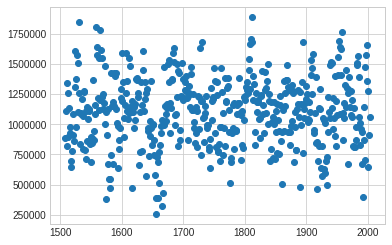

In [149]:
plt.scatter(df_merged['Year'], df_merged['KLK_Reconstruction_Flow_AF'])

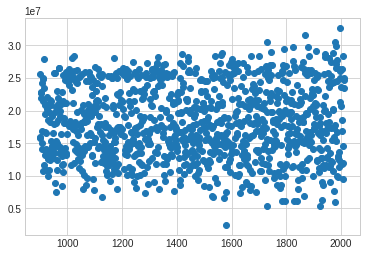

In [150]:
plt.scatter(df_merged['Year'], df_merged['SAC4_Reconstruction_Flow_AF'])

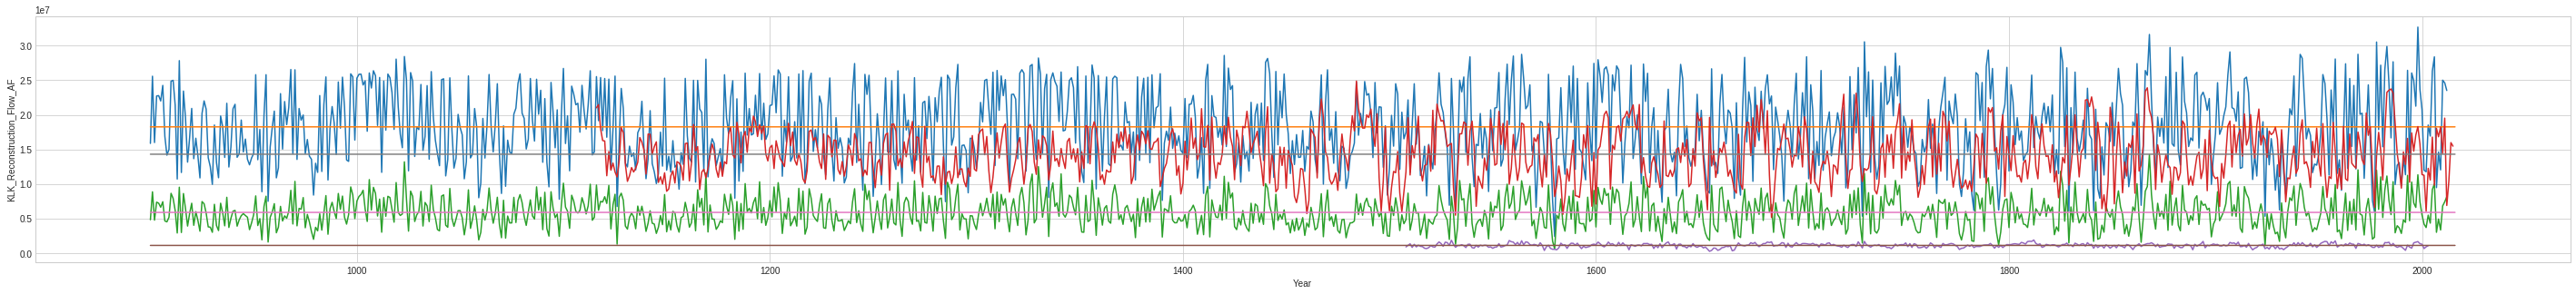

In [151]:
plt.figure(figsize=(50,5))
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['SAC4_Reconstruction_Flow_AF'])
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['SAC4_Reconstruction_Flow_AF'].mean())
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['SJQ4_Reconstruction_Flow_AF'])
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['Colo_Reconstruction_Flow_TAF'])
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['KLK_Reconstruction_Flow_AF'])
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['KLK_Reconstruction_Flow_AF'].mean())

ax = sns.lineplot(x=df_merged['Year'], y=df_merged['SJQ4_Reconstruction_Flow_AF'].mean())
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['Colo_Reconstruction_Flow_TAF'].mean())

#### Sacramento, San Joaquin, Colorado over time

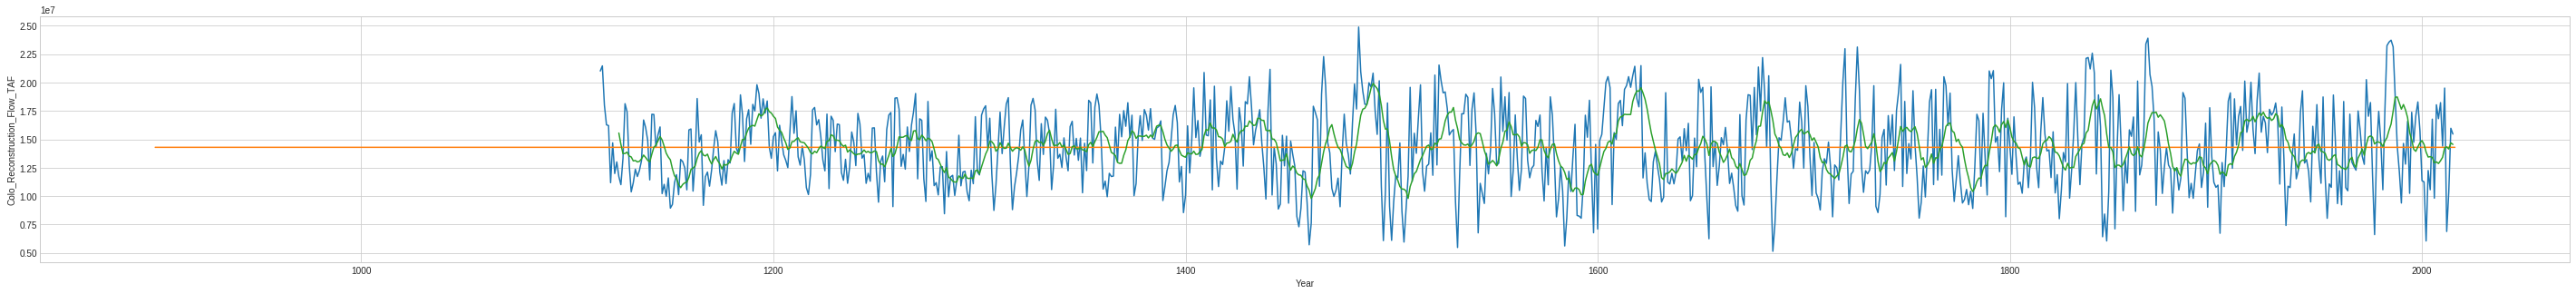

In [152]:
plt.figure(figsize=(50,5))

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='top')

ax = sns.lineplot(x=df_merged['Year'], y=df_merged['Colo_Reconstruction_Flow_TAF'])
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['Colo_Reconstruction_Flow_TAF'].mean())
ax = sns.lineplot(x=df_merged['Year'], y=df_merged['Colo_Reconstruction_Flow_TAF'].rolling(10).mean())

In [153]:
df_merged.tail()

Year  ...  Colo_Reconstruction_Flow_TAF
1112  2012  ...                     6885708.0
1113  2013  ...                    10391615.0
1114  2014  ...                    15980435.0
1115  2015  ...                    15467181.0
1116  2016  ...                           NaN

[5 rows x 6 columns]

# Building my final dataframe to graph

In [0]:
df_merged_dropped = df_merged.drop(columns = ['KLK_Reconstruction_Flow_AF', 'Kern_Reconstruction_Flow_TAF'], axis = 1)


In [155]:

df_merged_dropped.head(20)

##Renaming the dataframe to make more sense
three_rivers = df_merged_dropped.rename(columns={'SAC4_Reconstruction_Flow_AF': 'Sacramento River', 'SJQ4_Reconstruction_Flow_AF' : 'San Joaquin River', 'Colo_Reconstruction_Flow_TAF': 'Colorado River'})


three_rivers.head(20)


Year  Sacramento River  San Joaquin River  Colorado River
0    900        15866000.0          4822100.0             NaN
1    901        25590000.0          8860200.0             NaN
2    902        15991000.0          4760300.0             NaN
3    903        22725000.0          7363200.0             NaN
4    904        22780000.0          7212000.0             NaN
5    905        22006000.0          6631800.0             NaN
6    906        24260000.0          7426600.0             NaN
7    907        16893000.0          4642200.0             NaN
8    908        14164000.0          4516400.0             NaN
9    909        15001000.0          5183900.0             NaN
10   910        24869000.0          8641200.0             NaN
11   911        24992000.0          7909800.0             NaN
12   912        21422000.0          6167200.0             NaN
13   913        10709000.0          2899700.0             NaN
14   914        27843000.0          9524900.0             NaN
15   915        11658000.0          2973300.0             NaN
16   916        23445000.0          8613200.0             NaN
17   917        19544000.0          6435000.0             NaN
18   918        13155000.0          3906000.0             NaN
19   919        16703000.0          5721600.0             NaN

# Building 10 year rolling averages


## A ten year rolling average is a common convention that water managers use to speak about flow rate over time


In [156]:
three_rivers['Sacramento River 10 Year Rolling Average'] = pd.Series(three_rivers['Sacramento River'].rolling(10).mean(), index = three_rivers.index)
three_rivers['San Joaquin River 10 Year Rolling Average'] = pd.Series(three_rivers['San Joaquin River'].rolling(10).mean(), index = three_rivers.index)
three_rivers['Colorado River 10 Year Rolling Average'] = pd.Series(three_rivers['Colorado River'].rolling(10).mean(), index = three_rivers.index)

three_rivers.tail(10)
#df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)

Year  ...  Colorado River 10 Year Rolling Average
1107  2007  ...                              13022059.2
1108  2008  ...                              12874551.7
1109  2009  ...                              13120903.7
1110  2010  ...                              13425198.3
1111  2011  ...                              14251391.7
1112  2012  ...                              14334732.1
1113  2013  ...                              14147932.7
1114  2014  ...                              14689204.6
1115  2015  ...                              14557826.2
1116  2016  ...                                     NaN

[10 rows x 7 columns]

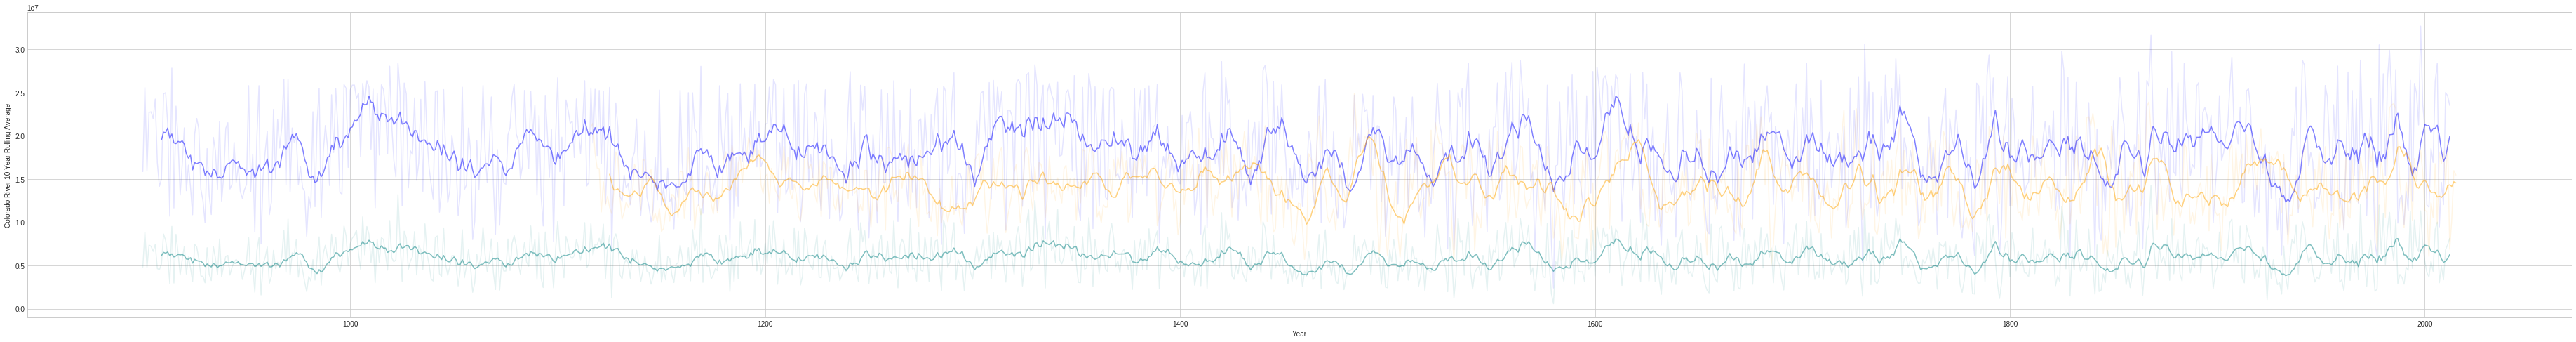

In [157]:
plt.figure(figsize=(65,8))

ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Sacramento River'], alpha=.1, color = 'blue')
ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['San Joaquin River'], alpha=.1, color = 'teal')
ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Colorado River'], alpha=.1, color = 'orange')

ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Sacramento River 10 Year Rolling Average'], alpha=.5, color = 'blue')
ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['San Joaquin River 10 Year Rolling Average'], alpha=.5, color = 'teal')
ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Colorado River 10 Year Rolling Average'], alpha=.5, color = 'orange')

plt.show()

In [158]:
three_rivers.describe()

Year  ...  Colorado River 10 Year Rolling Average
count  1117.000000  ...                            8.910000e+02
mean   1458.000000  ...                            1.428524e+07
std     322.594431  ...                            1.729029e+06
min     900.000000  ...                            9.791420e+06
25%    1179.000000  ...                            1.314087e+07
50%    1458.000000  ...                            1.418027e+07
75%    1737.000000  ...                            1.526655e+07
max    2016.000000  ...                            1.992843e+07

[8 rows x 7 columns]

The standard deviation is highest on the Sacramento and lowest on the San Joaquin

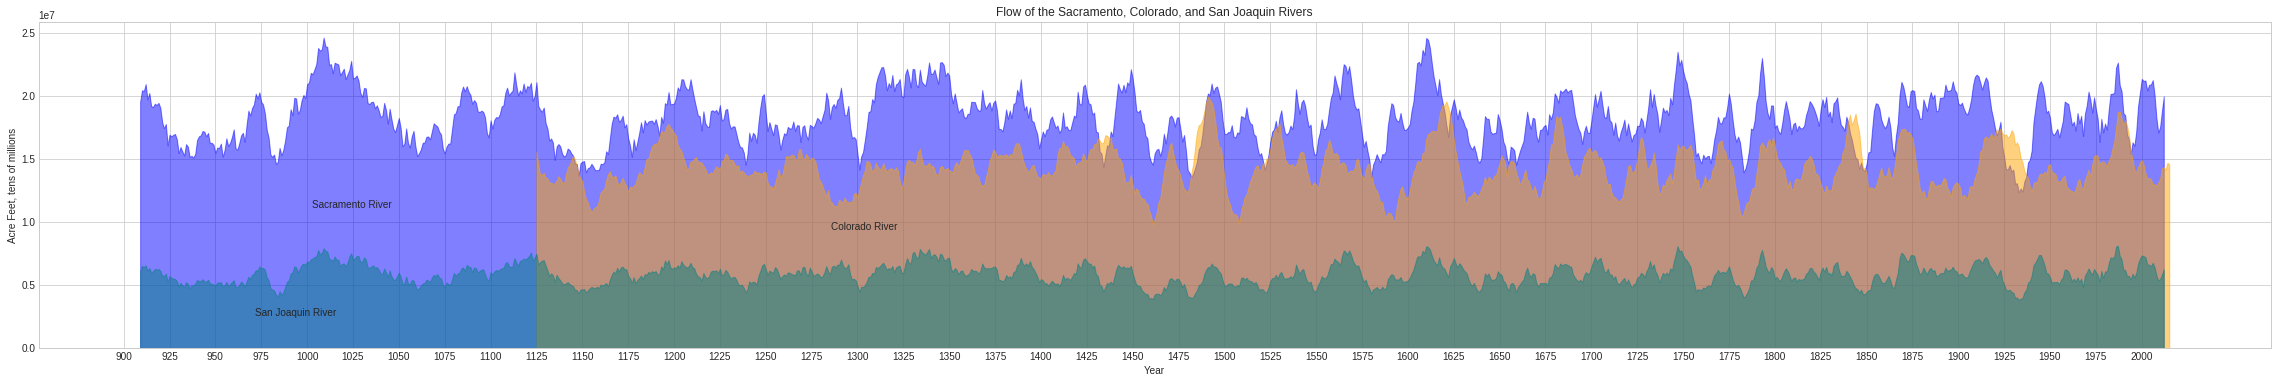

In [159]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(40,6))

plt.stackplot(three_rivers['Year'], three_rivers['Sacramento River 10 Year Rolling Average'], alpha=0.5, color = 'blue')
plt.stackplot(three_rivers['Year'], three_rivers['Colorado River 10 Year Rolling Average'], alpha=0.5, color = 'orange')
plt.stackplot(three_rivers['Year'], three_rivers['San Joaquin River 10 Year Rolling Average'], alpha=0.5, color = 'teal')

plt.xticks(np.arange(min(three_rivers['Year']), max(three_rivers['Year'])+1, 25))
plt.ylabel("Acre Feet, tens of millions")
plt.xlabel("Year")
plt.title('Flow of the Sacramento, Colorado, and San Joaquin Rivers')

plt.figtext(.22, .45, "Sacramento River")
plt.figtext(.2, .2, "San Joaquin River")
plt.figtext(.4, .4, "Colorado River")

#ax.ticklabel_format(useOffset=False, style='plain')

plt.show();

#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Sacramento River'], alpha=.1, color = 'blue')
#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['San Joaquin River'], alpha=.1, color = 'teal')
#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Colorado River'], alpha=.1, color = 'orange')

#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Sacramento River 10 Year Rolling Average'], alpha=.5, color = 'blue')
#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['San Joaquin River 10 Year Rolling Average'], alpha=.5, color = 'teal')
#ax = sns.lineplot(x=three_rivers['Year'], y=three_rivers['Colorado River 10 Year Rolling Average'], alpha=.5, color = 'orange')

In [160]:
three_rivers.corr()

Year  ...  Colorado River 10 Year Rolling Average
Year                                       1.000000  ...                                0.061504
Sacramento River                           0.000733  ...                                0.055118
San Joaquin River                         -0.000877  ...                                0.086115
Colorado River                             0.020794  ...                                0.370855
Sacramento River 10 Year Rolling Average   0.001708  ...                                0.245686
San Joaquin River 10 Year Rolling Average -0.002343  ...                                0.353133
Colorado River 10 Year Rolling Average     0.061504  ...                                1.000000

[7 rows x 7 columns]

# Normalizing the data

In [161]:

### drop the year column
three_rivers_values = three_rivers.drop(columns = 'Year', axis=1)

three_rivers_values.tail(20)


Sacramento River  ...  Colorado River 10 Year Rolling Average
1097        21256000.0  ...                              13948138.4
1098        32698000.0  ...                              14339347.5
1099        23689000.0  ...                              14698224.4
1100        20758000.0  ...                              14894760.8
1101        11994000.0  ...                              14556301.5
1102        11763000.0  ...                              13879570.5
1103        18523000.0  ...                              13446293.9
1104        16928000.0  ...                              13478046.9
1105        26323000.0  ...                              13417158.6
1106        28393000.0  ...                              12924667.8
1107         9470000.0  ...                              13022059.2
1108        14623000.0  ...                              12874551.7
1109        12034000.0  ...                              13120903.7
1110        25015000.0  ...                              13425198.3
1111        24627000.0  ...                              14251391.7
1112        23524000.0  ...                              14334732.1
1113               NaN  ...                              14147932.7
1114               NaN  ...                              14689204.6
1115               NaN  ...                              14557826.2
1116               NaN  ...                                     NaN

[20 rows x 6 columns]

In [162]:
from sklearn.preprocessing import StandardScaler

##instantiate the object
scaler = StandardScaler()
print(scaler.fit(three_rivers_values))

##this is the mean of each attribute. Matches with the .describe() function above
print(scaler.mean_)

##each column is divided by its standard deviation
scaled_df = scaler.transform(three_rivers_values)

three_rivers_normalized = pd.DataFrame(scaled_df)

three_rivers_normalized.tail(10)

StandardScaler(copy=True, with_mean=True, with_std=True)
[18261161.09613657  5882386.85534591 14301762.38888889 18243340.48913043
  5877786.39492754 14285243.2359147 ]


0         1         2         3         4         5
1107 -1.569872 -1.274856  1.031763  0.856688  0.661507 -0.730985
1108 -0.649680 -0.424963  0.695030  0.001448 -0.121900 -0.816345
1109 -1.112008 -1.125823  1.083510 -0.550023 -0.626482 -0.673785
1110  1.206059  0.413687  0.027577 -0.348598 -0.466562 -0.497694
1111  1.136772  0.676654  1.437129  0.249148 -0.071816 -0.019589
1112  0.939805  1.003978 -2.042098  0.805634  0.473902  0.028638
1113       NaN       NaN -1.076705       NaN       NaN -0.079459
1114       NaN       NaN  0.462242       NaN       NaN  0.233766
1115       NaN       NaN  0.320912       NaN       NaN  0.157739
1116       NaN       NaN       NaN       NaN       NaN       NaN

In [163]:

three_rivers_normalized_renamed = three_rivers_normalized.rename({0: 'Sacramento River', 1: 'San Joaquin River', 2: 'Colorado River', 3: 'Sacramento River 10 Year Rolling Average', 4: 'San Joaquin River 10 Year Rolling Average', 5: 'Colorado River 10 Year Rolling Average'}, axis = 1)
#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1) 
three_rivers_normalized_renamed.tail(10)



Sacramento River  ...  Colorado River 10 Year Rolling Average
1107         -1.569872  ...                               -0.730985
1108         -0.649680  ...                               -0.816345
1109         -1.112008  ...                               -0.673785
1110          1.206059  ...                               -0.497694
1111          1.136772  ...                               -0.019589
1112          0.939805  ...                                0.028638
1113               NaN  ...                               -0.079459
1114               NaN  ...                                0.233766
1115               NaN  ...                                0.157739
1116               NaN  ...                                     NaN

[10 rows x 6 columns]

In [164]:
three_rivers_normalized_renamed.insert(loc=0, column='Year', value=three_rivers['Year'])

##above is a better way to insert this column, putting the "year" in 0th position
#three_rivers_normalized_renamed['Year'] = pd.Series(three_rivers['Year'], index = three_rivers.index)

three_rivers_normalized_renamed.tail(10)

Year  ...  Colorado River 10 Year Rolling Average
1107  2007  ...                               -0.730985
1108  2008  ...                               -0.816345
1109  2009  ...                               -0.673785
1110  2010  ...                               -0.497694
1111  2011  ...                               -0.019589
1112  2012  ...                                0.028638
1113  2013  ...                               -0.079459
1114  2014  ...                                0.233766
1115  2015  ...                                0.157739
1116  2016  ...                                     NaN

[10 rows x 7 columns]

In [0]:
###All the rivers are normalized and plotted against each other

#plt.figure(figsize=(70,8))

#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[5])
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[5].mean())
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[5].rolling(10).mean())
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[4])
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[3])
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[2])
#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[1])



Text(0.5, 0, 'Year')

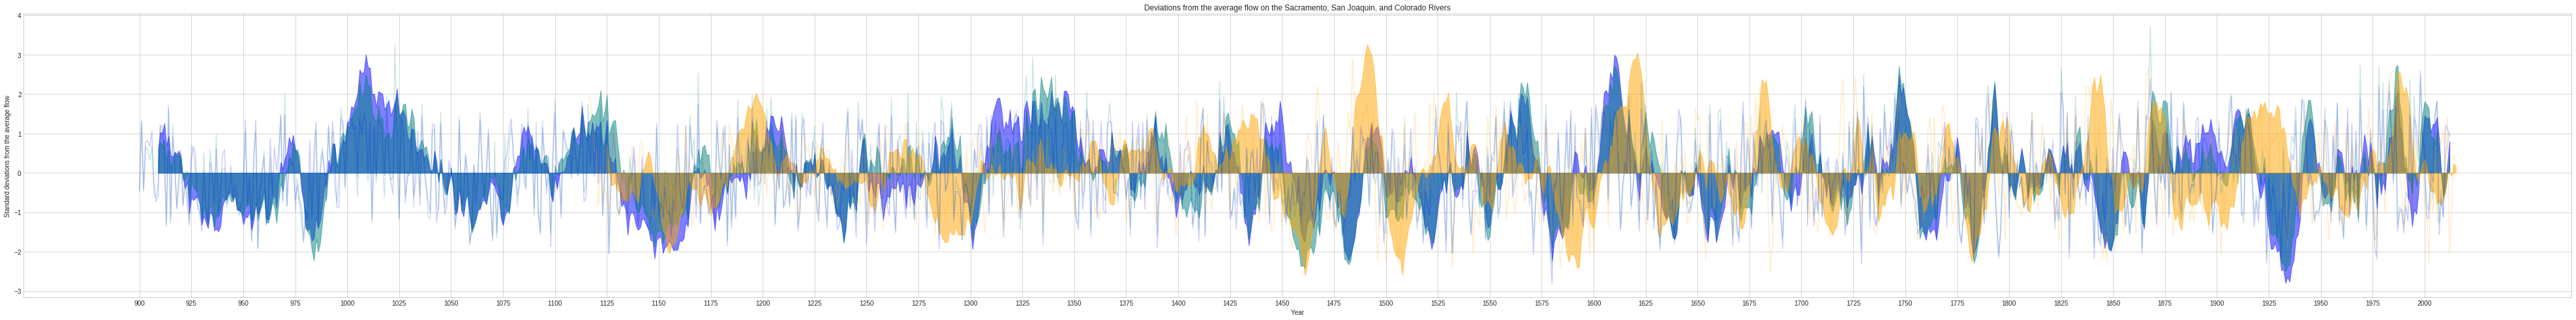

In [165]:
plt.figure(figsize=(70,8))

plt.stackplot(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Sacramento River 10 Year Rolling Average'], alpha=0.5, color = 'blue')
ax = sns.lineplot(x=three_rivers_normalized_renamed['Year'], y=three_rivers_normalized_renamed['Sacramento River'], alpha=.2, color = 'blue')

plt.stackplot(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['San Joaquin River 10 Year Rolling Average'], alpha=0.5, color = 'teal')
ax = sns.lineplot(x=three_rivers_normalized_renamed['Year'], y=three_rivers_normalized_renamed['San Joaquin River'], alpha=.2, color = 'teal')

plt.stackplot(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average'], alpha=0.5, color = 'orange')
ax = sns.lineplot(x=three_rivers_normalized_renamed['Year'], y=three_rivers_normalized_renamed['Colorado River'], alpha=.2, color = 'orange')

plt.xticks(np.arange(min(three_rivers_normalized_renamed['Year']), max(three_rivers_normalized_renamed['Year'])+1, 25))

plt.title('Deviations from the average flow on the Sacramento, San Joaquin, and Colorado Rivers')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")



# Examining Drought more closely




####Drought is one of the key things that stands out in this dataset.
We will examine the flow of the Colorado, only looking at the drought condition.


In [166]:
###Filtering a dataframe to only get those values when there is a 10 year drought

Colorado_drought_frame = three_rivers[((three_rivers['Colorado River'] < three_rivers['Colorado River'].mean()) == True)|((three_rivers['Colorado River 10 Year Rolling Average'] < three_rivers['Colorado River'].mean()) == True)]

Colorado_drought_frame.tail(10)



Year  ...  Colorado River 10 Year Rolling Average
1104  2004  ...                              13478046.9
1105  2005  ...                              13417158.6
1106  2006  ...                              12924667.8
1107  2007  ...                              13022059.2
1108  2008  ...                              12874551.7
1109  2009  ...                              13120903.7
1110  2010  ...                              13425198.3
1111  2011  ...                              14251391.7
1112  2012  ...                              14334732.1
1113  2013  ...                              14147932.7

[10 rows x 7 columns]

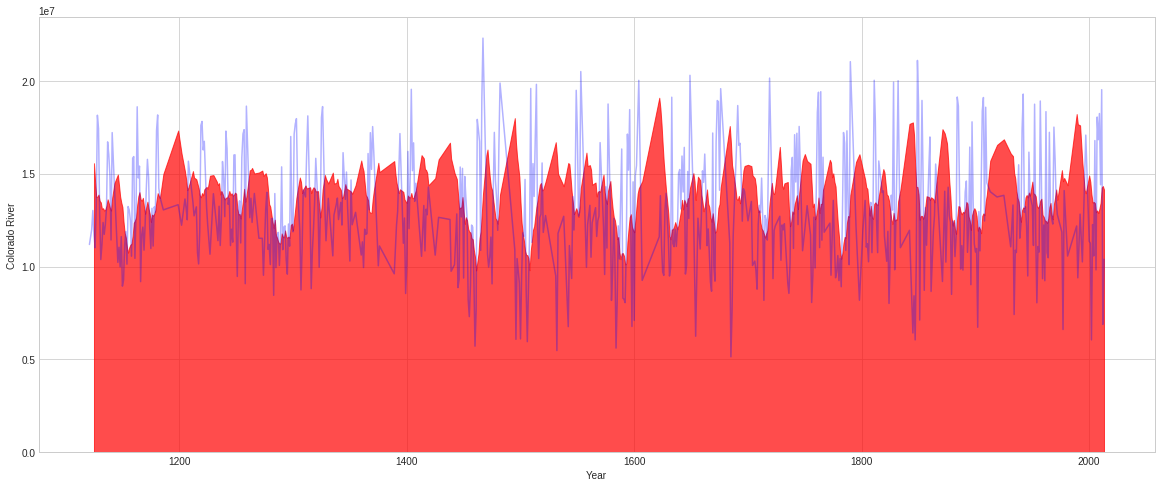

In [167]:
plt.figure(figsize=(20,8))

plt.stackplot(Colorado_drought_frame['Year'], Colorado_drought_frame['Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'red')
ax = sns.lineplot(x=Colorado_drought_frame['Year'], y=Colorado_drought_frame['Colorado River'], alpha=.3, color = 'blue')

### all years where either the flow or 10 year average is below the mean


#ax = sns.lineplot(x=df_merged['Year'], y=scaleddf1[5].rolling(10).mean())

In [168]:
##Creating a drought frame from the normalized data

Colorado_drought_frame_normalized = three_rivers_normalized_renamed[((three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average'] < three_rivers_normalized_renamed['Colorado River'].mean()) == True)]

Colorado_drought_frame_normalized.tail(10)


Year  ...  Colorado River 10 Year Rolling Average
1103  2003  ...                               -0.485487
1104  2004  ...                               -0.467112
1105  2005  ...                               -0.502347
1106  2006  ...                               -0.787344
1107  2007  ...                               -0.730985
1108  2008  ...                               -0.816345
1109  2009  ...                               -0.673785
1110  2010  ...                               -0.497694
1111  2011  ...                               -0.019589
1113  2013  ...                               -0.079459

[10 rows x 7 columns]

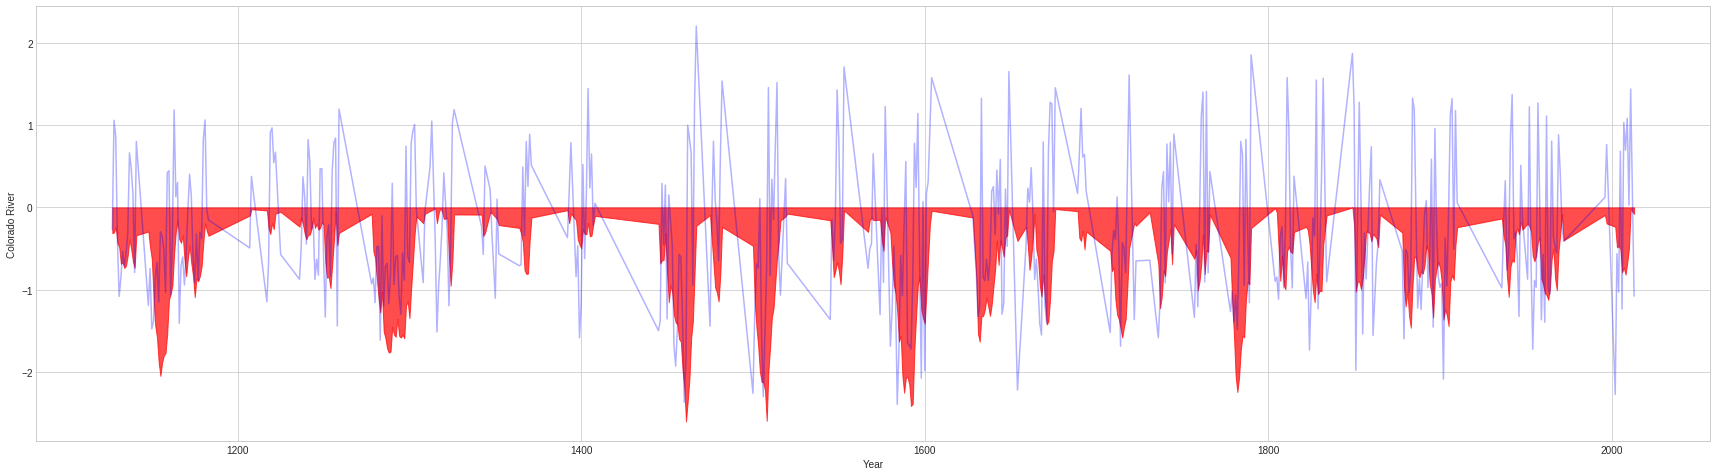

In [169]:

plt.figure(figsize=(30,8))

plt.stackplot(Colorado_drought_frame_normalized['Year'], Colorado_drought_frame_normalized['Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'red')
ax = sns.lineplot(x=Colorado_drought_frame_normalized['Year'], y=Colorado_drought_frame_normalized['Colorado River'], alpha=.3, color = 'blue')

### all years where the 10 year average is below the mean


### I don't really like this graph because it doesn't make sense that the "year" is still a continuous variable, becuase I removed half of the years
### 

<BarContainer object of 465 artists>

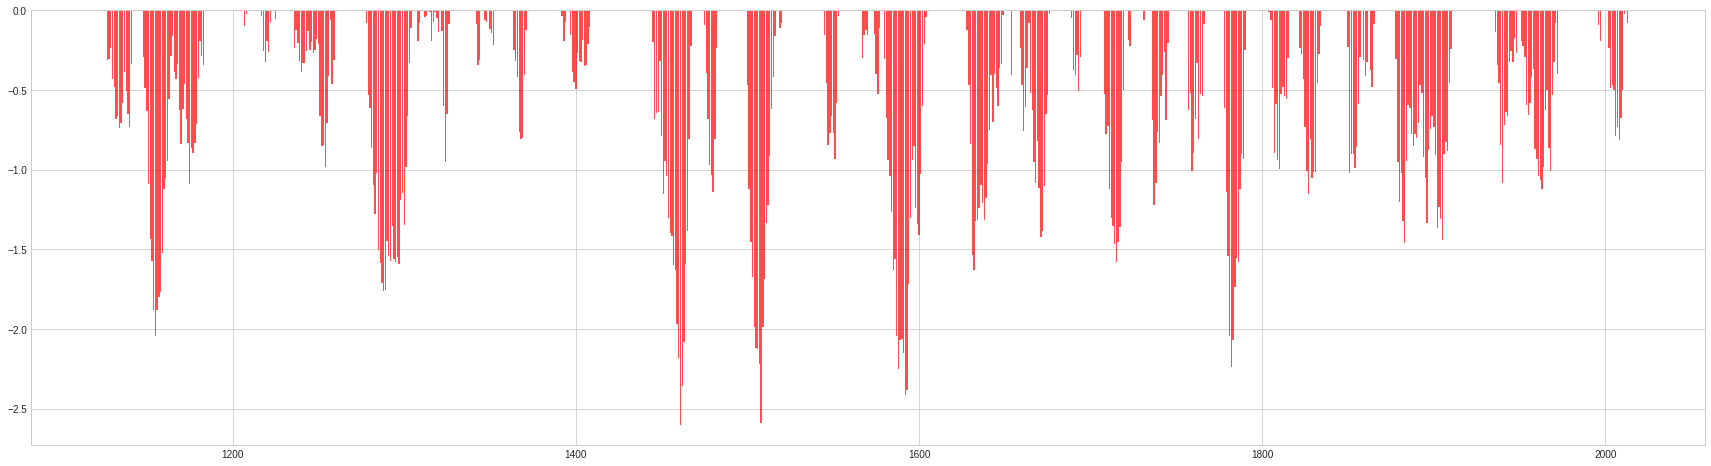

In [170]:
###All the years when there was a drought

plt.figure(figsize=(30,8))

plt.bar(Colorado_drought_frame_normalized['Year'], Colorado_drought_frame_normalized['Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'red')


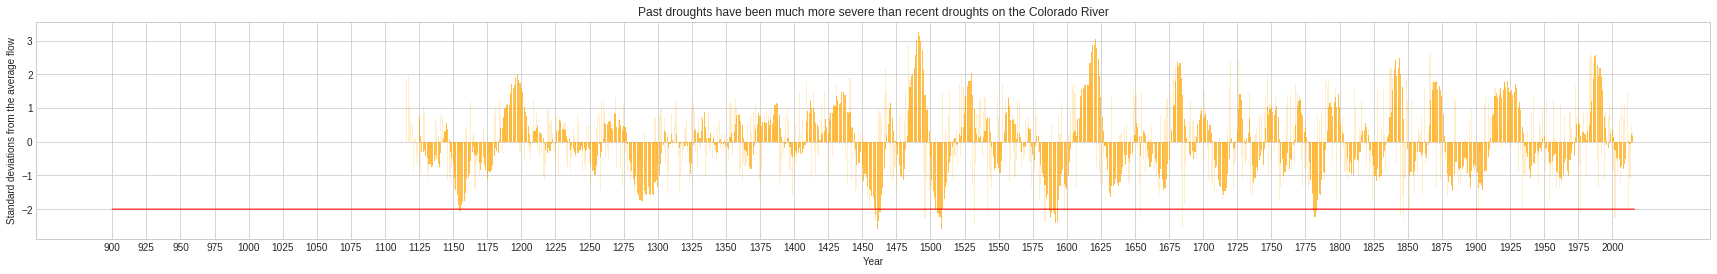

In [171]:
plt.figure(figsize=(30,4))
#sns.despine()
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'orange')
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Colorado River'], alpha=0.2, color = 'orange')
plt.xticks(np.arange(min(three_rivers_normalized_renamed['Year']), max(three_rivers_normalized_renamed['Year'])+1, 25))

##plt.annotate('4th of July', xy=(5, 5), xytext=(5, 2), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.figtext(.5, 1, "test")

plt.title('Past droughts have been much more severe than recent droughts on the Colorado River')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")
ax = sns.lineplot(x=three_rivers_normalized_renamed['Year'], y=-2, alpha=.7, color = 'red')


#facecolor='black', shrink=0.05)
plt.show()

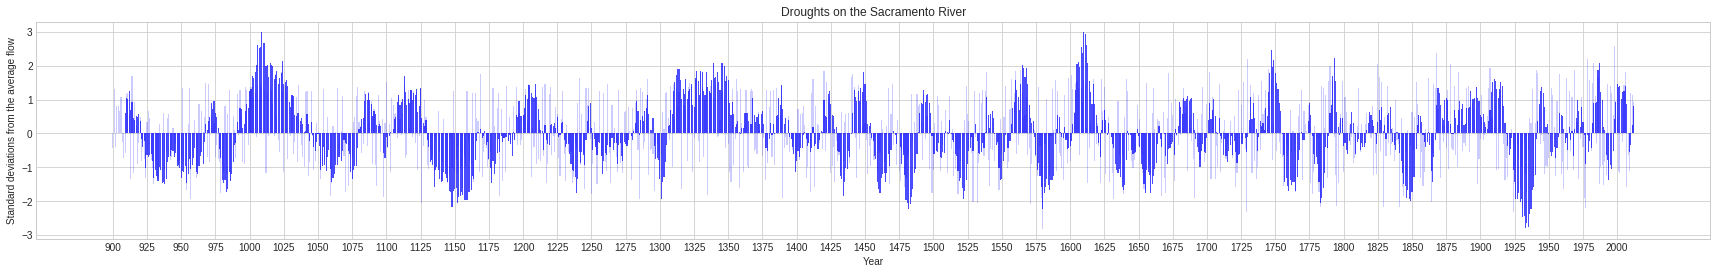

In [172]:
plt.figure(figsize=(30,4))
#sns.despine()
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Sacramento River 10 Year Rolling Average'], alpha=0.7, color = 'blue')
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['Sacramento River'], alpha=0.2, color = 'blue')
plt.xticks(np.arange(min(three_rivers_normalized_renamed['Year']), max(three_rivers_normalized_renamed['Year'])+1, 25))

##plt.annotate('4th of July', xy=(5, 5), xytext=(5, 2), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.figtext(.5, 1, "test")

plt.title('Droughts on the Sacramento River')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")

#facecolor='black', shrink=0.05)
plt.show()

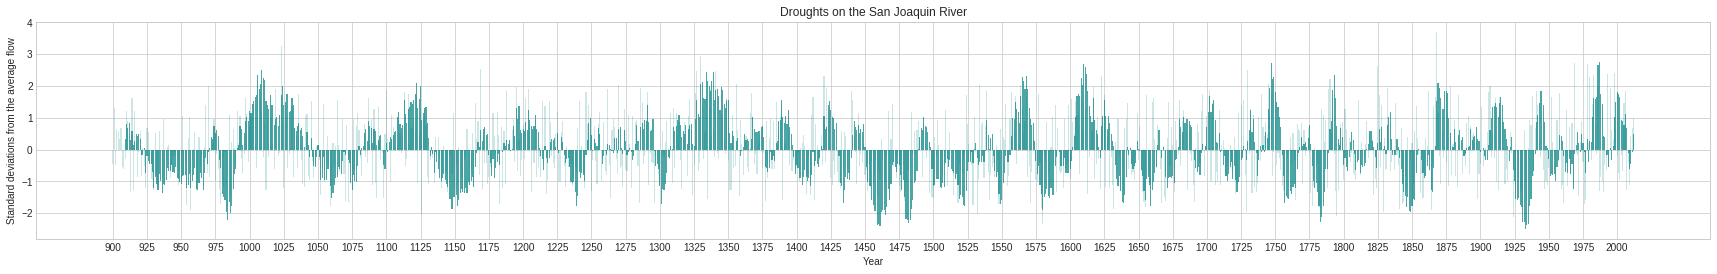

In [173]:
plt.figure(figsize=(30,4))
#sns.despine()
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['San Joaquin River 10 Year Rolling Average'], alpha=0.7, color = 'teal')
plt.bar(three_rivers_normalized_renamed['Year'], three_rivers_normalized_renamed['San Joaquin River'], alpha=0.2, color = 'teal')
plt.xticks(np.arange(min(three_rivers_normalized_renamed['Year']), max(three_rivers_normalized_renamed['Year'])+1, 25))

##plt.annotate('4th of July', xy=(5, 5), xytext=(5, 2), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.figtext(.5, 1, "test")

plt.title('Droughts on the San Joaquin River')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")

#facecolor='black', shrink=0.05)
plt.show()

<BarContainer object of 1117 artists>

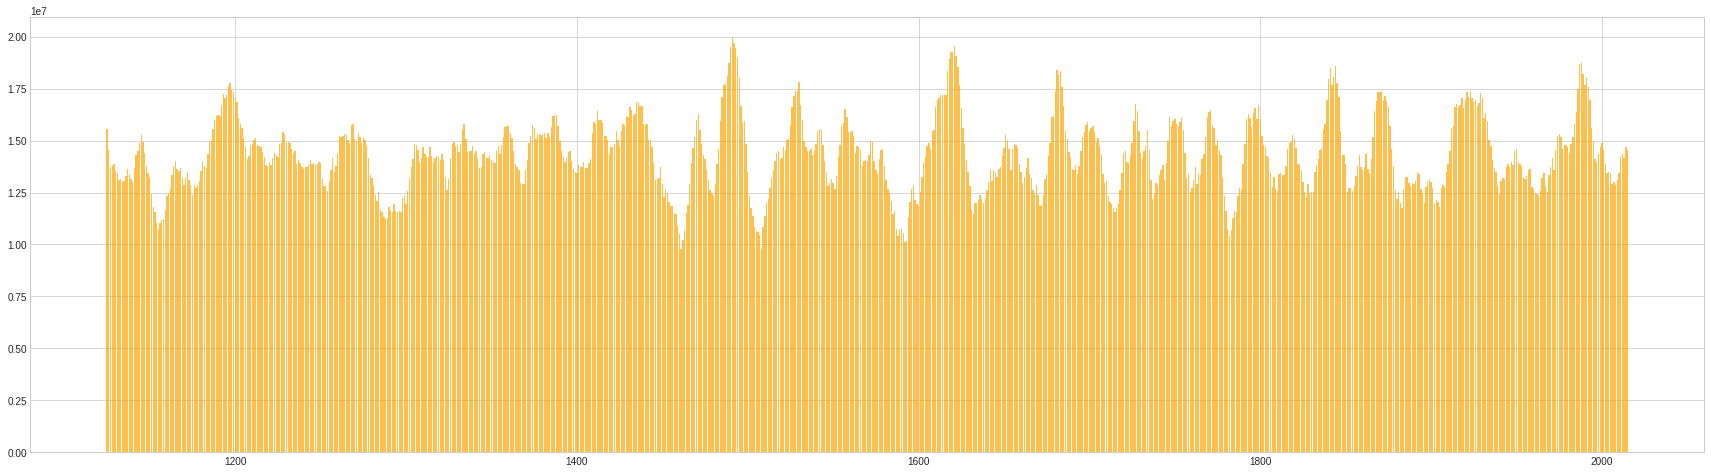

In [174]:
plt.figure(figsize=(30,8))
#sns.despine()
plt.bar(three_rivers['Year'], three_rivers['Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'orange')

#Doing statistical tests on the data
`

## *T* test

This test doesn't really make sense for my data


In [175]:
###I Don't know if statistical test really make sense for these data
from scipy import stats

stats.ttest_ind(three_rivers_normalized_renamed['Colorado River'], three_rivers_normalized_renamed['Sacramento River'], nan_policy='omit')

#I reject the null hypothesis that they're the same. They look polar opposite.

Ttest_indResult(statistic=-1.1024805146934897e-15, pvalue=1.0)

In [176]:
three_rivers_values.describe()

Sacramento River  ...  Colorado River 10 Year Rolling Average
count      1.113000e+03  ...                            8.910000e+02
mean       1.826116e+07  ...                            1.428524e+07
std        5.602441e+06  ...                            1.729029e+06
min        2.399500e+06  ...                            9.791420e+06
25%        1.388600e+07  ...                            1.314087e+07
50%        1.780000e+07  ...                            1.418027e+07
75%        2.295600e+07  ...                            1.526655e+07
max        3.269800e+07  ...                            1.992843e+07

[8 rows x 6 columns]

In [177]:
three_rivers_values.corr()

Sacramento River  ...  Colorado River 10 Year Rolling Average
Sacramento River                                   1.000000  ...                                0.055118
San Joaquin River                                  0.939919  ...                                0.086115
Colorado River                                     0.314767  ...                                0.370855
Sacramento River 10 Year Rolling Average           0.348777  ...                                0.245686
San Joaquin River 10 Year Rolling Average          0.327920  ...                                0.353133
Colorado River 10 Year Rolling Average             0.055118  ...                                1.000000

[6 rows x 6 columns]

In [178]:
three_rivers_normalized_renamed.std()

Year                                         322.594431
Sacramento River                               1.000450
San Joaquin River                              1.000450
Colorado River                                 1.000556
Sacramento River 10 Year Rolling Average       1.000453
San Joaquin River 10 Year Rolling Average      1.000453
Colorado River 10 Year Rolling Average         1.000562
dtype: float64

In [179]:
df.head()

Year  ...  Colo_Upper_50Percent_Confidence_Flow_TAF
0  1116  ...                                 23555.608
1  1117  ...                                 24007.123
2  1118  ...                                 20556.740
3  1119  ...                                 18775.425
4  1120  ...                                 18697.363

[5 rows x 25 columns]

In [180]:
df.corr() 

Year  ...  Colo_Upper_50Percent_Confidence_Flow_TAF
Year                                       1.000000  ...                                 -0.062383
Arroyo_Seco_Reconstruction_Flow_TAF       -0.001180  ...                                  0.388380
Arroyo_Seco_Lower_50Percent_Flow_TAF       0.104399  ...                                  0.383012
Arroyo_Seco_Flow_Upper_50Percent_Flow_TAF -0.159213  ...                                  0.389675
SanGab_Reconstruction_Precip_inches        0.038626  ...                                  0.368769
SanGab_Flow_Lower_50Percent_Precip_inches  0.175971  ...                                  0.353942
SanGab_Flow_Upper_50Percent_Precip_inches -0.055291  ...                                  0.373170
SantaAna_Reconstruction_Flow_TAF           0.041337  ...                                  0.419242
SantaAna_Lower_50Percent_Flow_TAF          0.079424  ...                                  0.415424
SantaAna_Upper_50Percent_Flow_TAF          0.016899  ...                                  0.420559
LakeArrow_Reconstruction_Precip_inches     0.001406  ...                                  0.338512
LakeArrow_Lower_50Percent_Precip_inches    0.041873  ...                                  0.331006
LakeArrow_Upper_50Percent_Precip_inches   -0.115840  ...                                  0.342619
Ojai_Reconstruction_Precip_inches          0.022456  ...                                  0.389466
Ojai_Lower_50Percent_Precip_inches         0.118553  ...                                  0.378506
Ojai_Upper_50Percent_Precip_inches        -0.091316  ...                                  0.393409
Cuyam_Reconstruction_Precip_inches         0.054714  ...                                  0.398371
Cuyam_Lower_50Percent_Precip_inches        0.117678  ...                                  0.392585
Cuyam_Upper_50Percent_Precip_inches       -0.014262  ...                                  0.400481
Kern_Reconstruction_Flow_TAF               0.029766  ...                                  0.412969
Kern_Lower_50Percent_Flow_TAF              0.072027  ...                                  0.418635
Kern_Upper_50Percent_Flow_TAF             -0.031986  ...                                  0.417043
Colo_Reconstruction_Flow_TAF               0.020794  ...                                  0.994633
Colo_Lower_50Percent_Confidence_Flow_TAF   0.128990  ...                                  0.972845
Colo_Upper_50Percent_Confidence_Flow_TAF  -0.062383  ...                                  1.000000

[25 rows x 25 columns]

In [181]:
df.describe()

Year  ...  Colo_Upper_50Percent_Confidence_Flow_TAF
count   901.000000  ...                                900.000000
mean   1566.000000  ...                              16175.282480
std     260.240594  ...                               3841.718111
min    1116.000000  ...                               6477.048000
25%    1341.000000  ...                              13418.452750
50%    1566.000000  ...                              15859.983000
75%    1791.000000  ...                              19233.006250
max    2016.000000  ...                              26705.843000

[8 rows x 25 columns]

There is some interesting stuff in here, but not as dramatic as the megadroughts of the past. Mostly, the correlations are what you would expect- rivers that are closer together have a higher correlation. This is not really groundbreaking.


#Comparing the drought severity and duration across river basins


###Calculating the percentage of the time that the basin in in severe drought (std <-1.5)

In [182]:
### return the number of years that the std is < 1.5 for each river

colorado_extreme_drought = three_rivers_normalized_renamed[(three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average'] < -1.5) == True]
#colorado_extreme_drought.head(10)
len(colorado_extreme_drought)

54

In [183]:
len(three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average'])

## this is length of the dataframe, not just the Colorado

1117

In [184]:
#length of the number of entries in the Colorado dataset
np.count_nonzero(~np.isnan(three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average']))

891

In [185]:
drought_percent_list = []

drought_percent = len(colorado_extreme_drought)/np.count_nonzero(~np.isnan(three_rivers_normalized_renamed['Colorado River 10 Year Rolling Average']))

drought_percent_list.append(drought_percent)

drought_percent_list


[0.06060606060606061]

In [186]:
##putting all of the above into a function

river_list = ['Colorado River 10 Year Rolling Average', 'Sacramento River 10 Year Rolling Average', 'San Joaquin River 10 Year Rolling Average']
drought_percentage_list = [-1,-1.5,-2]

drought_percent_list = []

for item in river_list:
  extreme_drought = three_rivers_normalized_renamed[(three_rivers_normalized_renamed[item] < -1.5) == True]
  drought_percent = len(extreme_drought)/np.count_nonzero(~np.isnan(three_rivers_normalized_renamed[item]))
  drought_percent = drought_percent*100
  drought_percent_list.append(drought_percent)

moderate_drought_frame = pd.DataFrame(drought_percent_list)

moderate_drought_frame = moderate_drought_frame.rename(columns={0: "Moderate Drought"}, index={0:'Colorado River', 1:'Sacramento River', 2:'San Joaquin River'})

print(moderate_drought_frame)

                   Moderate Drought
Colorado River             6.060606
Sacramento River           6.702899
San Joaquin River          6.521739


In [187]:
##putting all of the above into a function

river_list = ['Colorado River 10 Year Rolling Average', 'Sacramento River 10 Year Rolling Average', 'San Joaquin River 10 Year Rolling Average']
drought_percent_list = []

for item in river_list:
  extreme_drought = three_rivers_normalized_renamed[(three_rivers_normalized_renamed[item] < -2) == True]
  drought_percent = len(extreme_drought)/np.count_nonzero(~np.isnan(three_rivers_normalized_renamed[item]))
  drought_percent = drought_percent*100
  drought_percent_list.append(drought_percent)

severe_drought_frame = pd.DataFrame(drought_percent_list)

severe_drought_frame = severe_drought_frame.rename(columns={0: "Severe Drought"}, index={0:'Colorado River', 1:'Sacramento River', 2:'San Joaquin River'})

print(severe_drought_frame)


                   Severe Drought
Colorado River           2.132435
Sacramento River         1.358696
San Joaquin River        1.539855


In [188]:
joined_drought_frame = moderate_drought_frame.join(severe_drought_frame, how='left')

joined_drought_frame

Moderate Drought  Severe Drought
Colorado River             6.060606        2.132435
Sacramento River           6.702899        1.358696
San Joaquin River          6.521739        1.539855

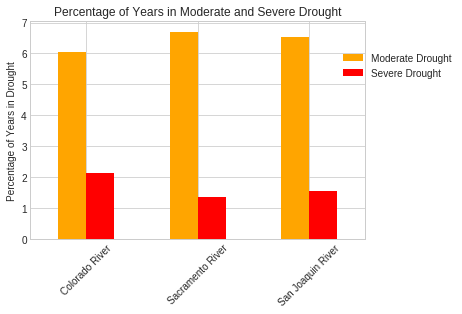

In [189]:

joined_drought_frame.plot.bar(color=['orange', 'red'])
#plt.bar(y_pos, height, )
#plt.figure(figsize=(8,10))
plt.xticks(rotation=45)
plt.title('Percentage of Years in Moderate and Severe Drought')
plt.legend(bbox_to_anchor=(1.12, .8),
           bbox_transform=plt.gcf().transFigure)
plt.ylabel("Percentage of Years in Drought")
plt.show();


To really make sure that the viewer understands where these data are coming from, I'm adding lines to the other charts


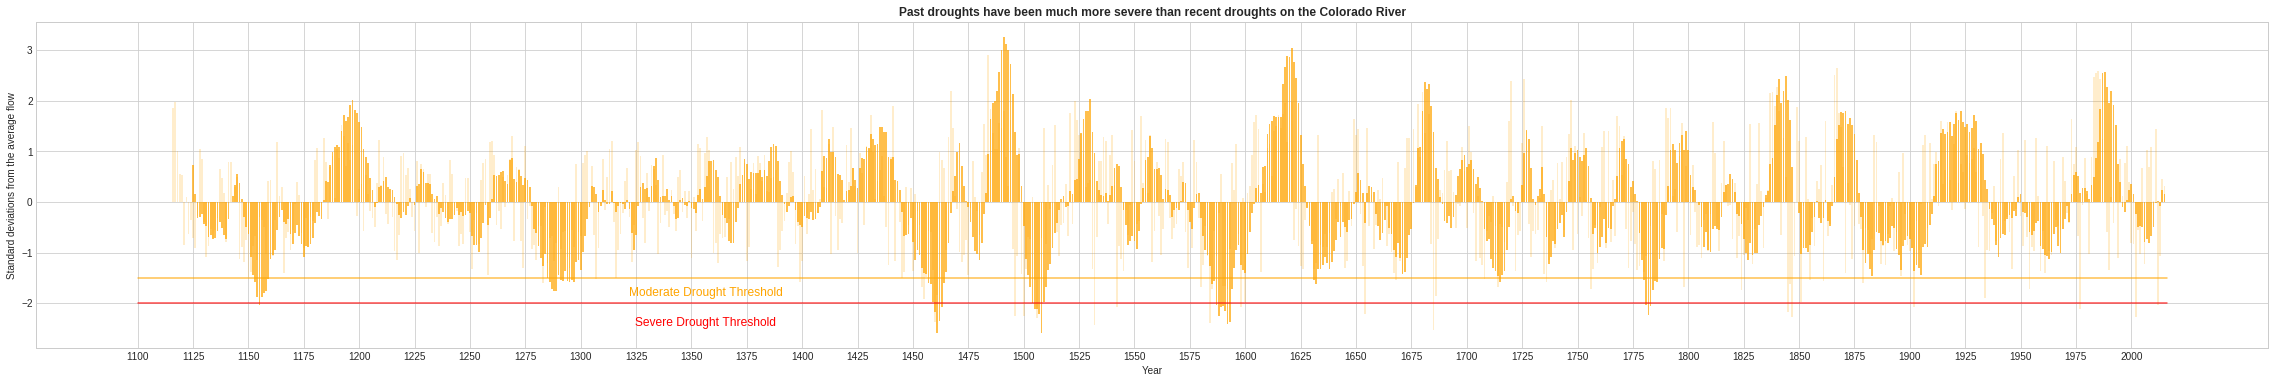

In [190]:
plt.figure(figsize=(40,6))
plt.bar(three_rivers_normalized_renamed.loc[200:, 'Year'], three_rivers_normalized_renamed.loc[200:, 'Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'orange')
plt.bar(three_rivers_normalized_renamed.loc[200:, 'Year'], three_rivers_normalized_renamed.loc[200:, 'Colorado River'], alpha=0.2, color = 'orange')
plt.xticks(np.arange(min(three_rivers_normalized_renamed.loc[200:, 'Year']), max(three_rivers_normalized_renamed.loc[200:, 'Year'])+1, 25))

plt.title('Past droughts have been much more severe than recent droughts on the Colorado River', fontweight='bold')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")
ax = sns.lineplot(x=three_rivers_normalized_renamed.loc[200:, 'Year'], y=-1.5, alpha=.7, color = 'orange')
ax = sns.lineplot(x=three_rivers_normalized_renamed.loc[200:, 'Year'], y=-2, alpha=.7, color = 'red')
ax.text(0.3, 0.06, 'Severe Drought Threshold',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='red', fontsize=12)
ax.text(0.3, 0.15, 'Moderate Drought Threshold',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='orange', fontsize=12)
plt.show()

In [191]:
## Calculating what 1.5 and 2x the standard deviation is in original units

three_rivers['Colorado River'].std()

3633605.027962794

In [192]:
three_rivers['Colorado River'].std() * 2

7267210.055925588

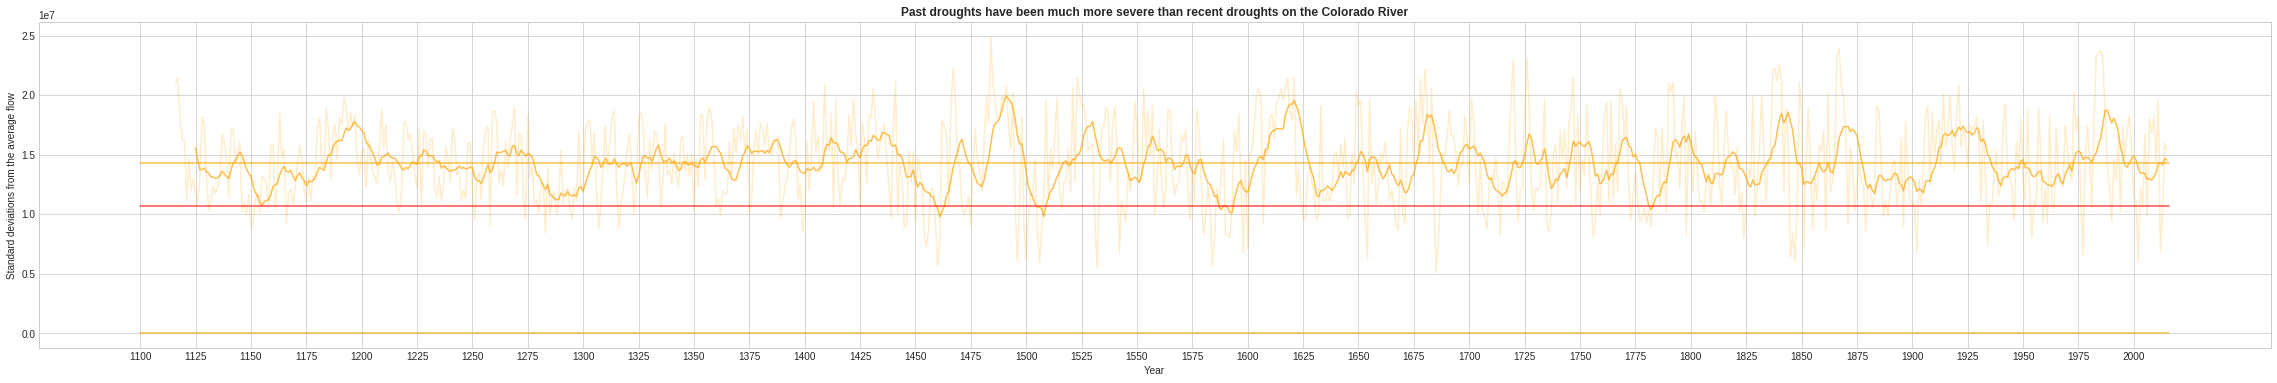

In [193]:
###One more graph, Colorado River converted into actual units as opposed to standard scaler.
plt.figure(figsize=(40,6))
plt.plot(three_rivers.loc[200:, 'Year'], three_rivers.loc[200:, 'Colorado River 10 Year Rolling Average'], alpha=0.7, color = 'orange')
plt.plot(three_rivers.loc[200:, 'Year'], three_rivers.loc[200:, 'Colorado River'], alpha=0.2, color = 'orange')
plt.xticks(np.arange(min(three_rivers.loc[200:, 'Year']), max(three_rivers.loc[200:, 'Year'])+1, 25))

plt.title('Past droughts have been much more severe than recent droughts on the Colorado River', fontweight='bold')
plt.ylabel("Standard deviations from the average flow")
plt.xlabel("Year")
ax = sns.lineplot(x=three_rivers.loc[200:, 'Year'], y=-1.5, alpha=.7, color = 'orange')
ax = sns.lineplot(x=three_rivers.loc[200:, 'Year'], y=three_rivers['Colorado River'].mean(), alpha=.7, color = 'orange')
ax = sns.lineplot(x=three_rivers.loc[200:, 'Year'], y=(three_rivers['Colorado River'].mean()) - (three_rivers['Colorado River'].std()), alpha=.7, color = 'red')


plt.show()